## load dataset

In [1]:
import polars as pl
from plotnine.data import mtcars

df = pl.from_pandas(mtcars)

df

name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
str,f64,i64,f64,i64,f64,f64,f64,i64,i64,i64,i64
"""Mazda RX4""",21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4
"""Mazda RX4 Wag""",21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4
"""Datsun 710""",22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
"""Hornet 4 Drive""",21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
"""Hornet Sportabout""",18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
…,…,…,…,…,…,…,…,…,…,…,…
"""Lotus Europa""",30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
"""Ford Pantera L""",15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4
"""Ferrari Dino""",19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6


## plotnine

plotnine 0.15.0


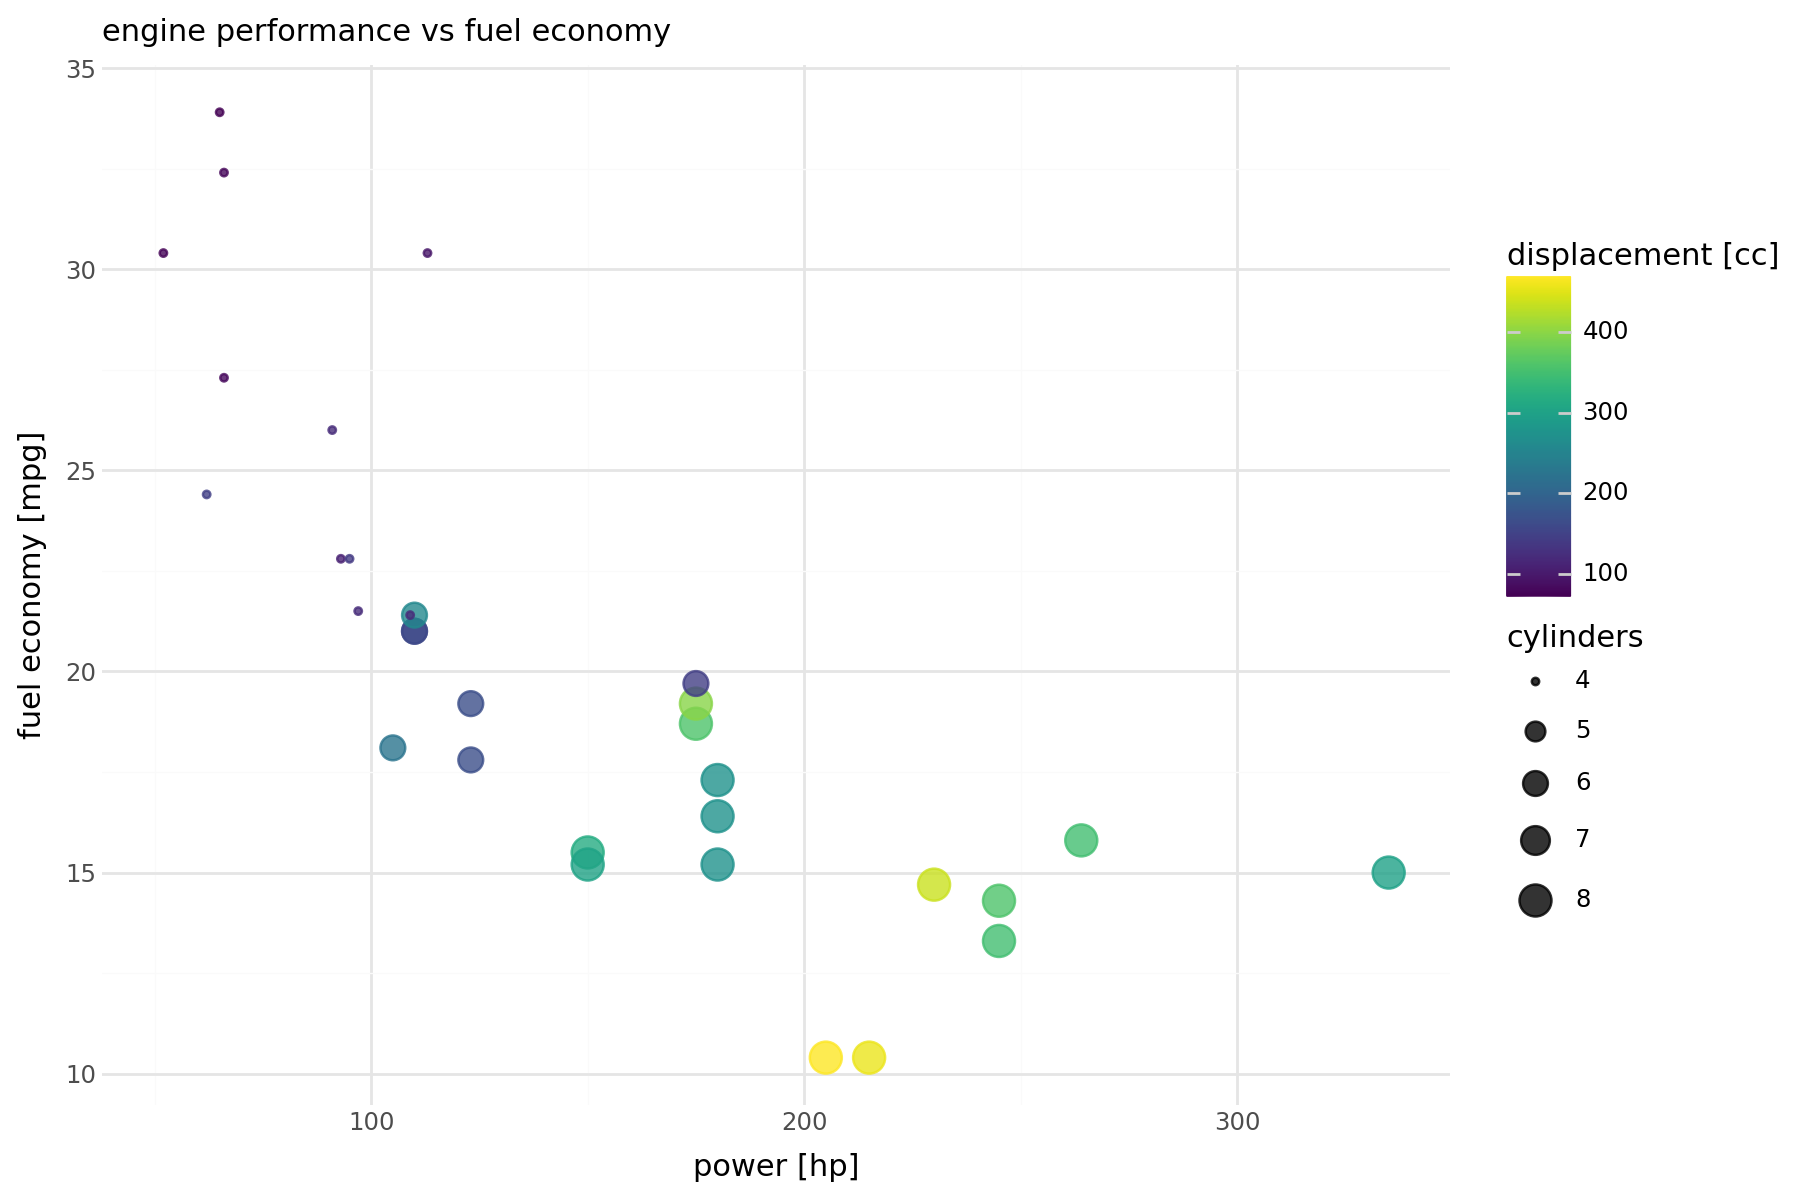

In [3]:
from plotnine import (
    ggplot,
    aes,
    geom_point,
    labs,
    theme,
    theme_minimal,
    __version__,
)

print(f'plotnine {__version__}')

(ggplot(df, aes(x='hp', y='mpg'))
    + geom_point(aes(color='disp', size='cyl'), alpha=0.8)
    + labs(
        subtitle='engine performance vs fuel economy',
        x='power [hp]',
        y='fuel economy [mpg]',
        color='displacement [cc]',
        size='cylinders',
    )
    + theme_minimal()
    + theme(
        figure_size=(9,6),
    )
)

## altair

In [34]:
import altair as alt

print(f'Altair {alt.__version__}')

alt.theme.enable('fivethirtyeight')

(alt.Chart(df, title='engine performance vs fuel economy')
    .mark_circle()
    .transform_calculate(
        custom_tooltip='"displacement: " + datum.disp',
    )
    .encode(
        x=alt.X('hp', title='power [hp]'),
        y=alt.Y('mpg', title='fuel economy [mpg]'),
        color=alt.Color('disp', title='displacement [cc]', bin=True),
        size=alt.Size('cyl', title='cylinders'),
        tooltip='custom_tooltip:N',
    )
    .properties(
        width=810,
        height=540,
    )
)

Altair 5.5.0


alt.Chart(...)